# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | keszthely
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | happy valley-goose bay
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | keflavik
Processing Record 8 of Set 1 | boa vista
Processing Record 9 of Set 1 | luocheng
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | dawesville
Processing Record 13 of Set 1 | mattighofen
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | hsinchu
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | saudarkrokur
Processing Record 19 of Set 1 | siwa oasis
Processing Record 20 of Set 1 | saint-joseph
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,16.64,68,64,0.45,US,1699383261
1,keszthely,46.7681,17.2432,9.94,100,0,2.57,HU,1699383262
2,puerto ayora,-0.7393,-90.3518,28.98,75,6,4.02,EC,1699383262
3,happy valley-goose bay,53.3168,-60.3315,-1.83,59,100,3.09,CA,1699383262
4,college,64.8569,-147.8028,-7.03,84,100,0.00,US,1699383262


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,16.64,68,64,0.45,US,1699383261
1,keszthely,46.7681,17.2432,9.94,100,0,2.57,HU,1699383262
2,puerto ayora,-0.7393,-90.3518,28.98,75,6,4.02,EC,1699383262
3,happy valley-goose bay,53.3168,-60.3315,-1.83,59,100,3.09,CA,1699383262
4,college,64.8569,-147.8028,-7.03,84,100,0.00,US,1699383262


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

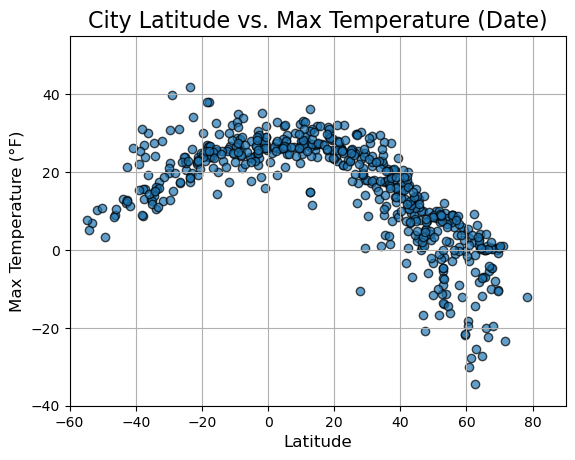

In [31]:
# Build scatter plot for latitude vs. temperature
# Scatter plot for Latitude vs. Temperature

#plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
# Set additional graph properties
plt.title("City Latitude vs. Max Temperature (Date)", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°F)", fontsize=12)

#Customize the plot further
plt.grid(True)
plt.xlim(-60, 90)  # Set x-axis limits to match the latitude range
plt.ylim(-40, 55)  # Set y-axis limits for a reasonable temperature range

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

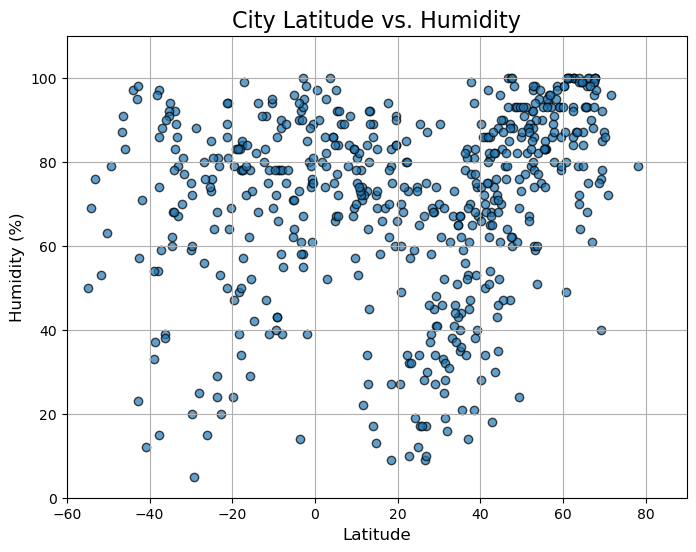

In [32]:
# Scatter plot for Latitude vs. Humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Set additional graph properties
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)

# Customize the plot further
plt.grid(True)
plt.xlim(-60, 90)  # Set x-axis limits to match the latitude range
plt.ylim(0, 110)   # Set y-axis limits for humidity percentage (0-100)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

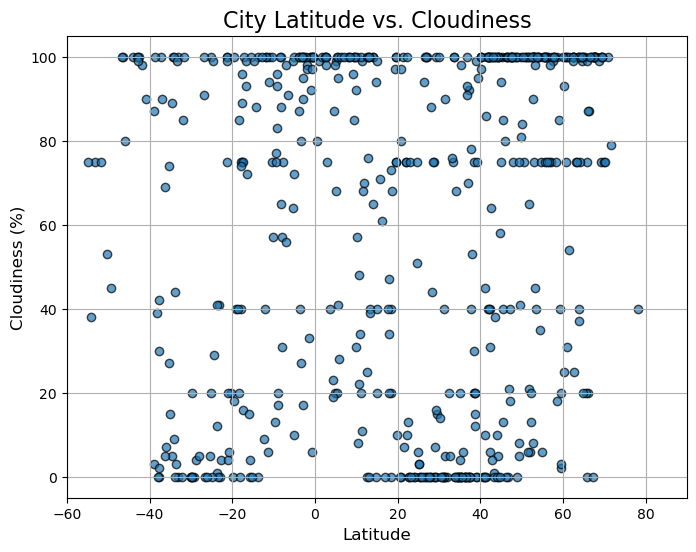

In [33]:
# Scatter plot for Latitude vs. Cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Set additional graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)

# Customize the plot further
plt.grid(True)
plt.xlim(-60, 90)  # Set x-axis limits to match the latitude range
plt.ylim(-5, 105)  # Set y-axis limits for cloudiness percentage (0-100)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

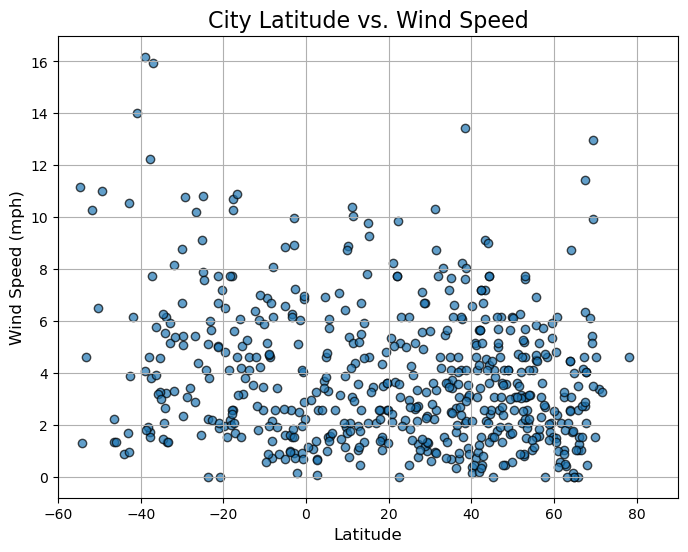

In [34]:
# Scatter plot for Latitude vs. Wind Speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Set additional graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)

# Customize the plot further
plt.grid(True)
plt.xlim(-60, 90)  # Set x-axis limits to match the latitude range

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


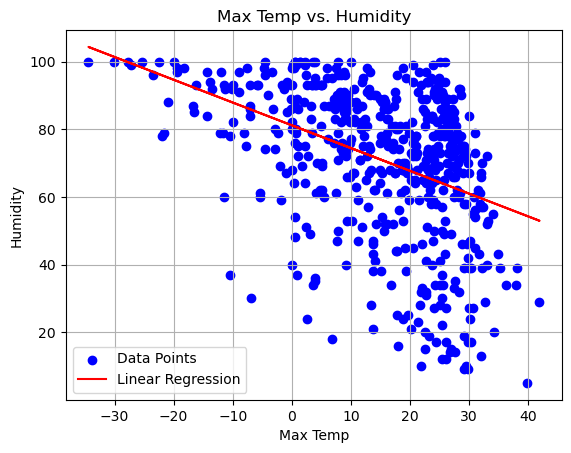

In [36]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Create a scatter plot of the data
    plt.scatter(x_data, y_data, marker='o', color='blue', label='Data Points')

    # Add a regression line to the plot
    regression_line = slope * x_data + intercept
    plt.plot(x_data, regression_line, color='red', label='Linear Regression')

    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add a legend to the plot
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


create_linear_regression_plot(city_data_df['Max Temp'], city_data_df['Humidity'], 'Max Temp', 'Humidity', 'Max Temp vs. Humidity')



In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,16.64,68,64,0.45,US,1699383261
1,keszthely,46.7681,17.2432,9.94,100,0,2.57,HU,1699383262
3,happy valley-goose bay,53.3168,-60.3315,-1.83,59,100,3.09,CA,1699383262
4,college,64.8569,-147.8028,-7.03,84,100,0.00,US,1699383262
5,iqaluit,63.7506,-68.5145,-8.15,79,100,2.57,CA,1699383262


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,28.98,75,6,4.02,EC,1699383262
9,edinburgh of the seven seas,-37.0676,-12.3116,15.75,88,90,15.92,SH,1699383263
13,nabire,-3.3667,135.4833,24.72,92,100,1.54,ID,1699383264
15,port alfred,-33.5906,26.8910,15.66,89,3,1.34,ZA,1699383264
16,port-aux-francais,-49.3500,70.2167,3.43,79,45,11.00,TF,1699383264


###  Temperature vs. Latitude Linear Regression Plot

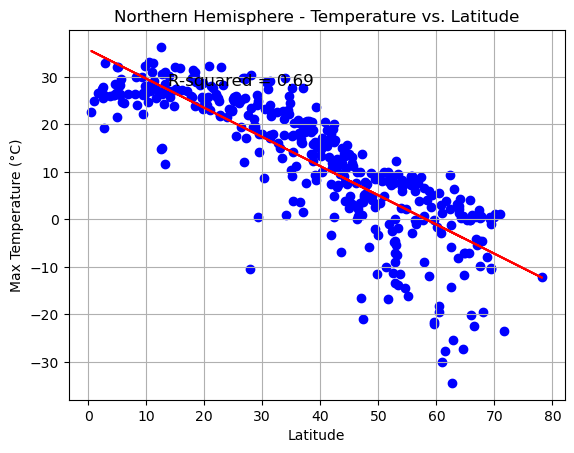

In [39]:
# Linear regression on Northern Hemisphere
# Define a function for linear regression and plotting

def perform_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Create a scatter plot of the data
    plt.scatter(x_data, y_data, marker='o', color='blue', label='Data Points')

    # Add a regression line to the plot
    regression_line = slope * x_data + intercept
    plt.plot(x_data, regression_line, color='red', label='Linear Regression')

    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the R-squared value on the plot
    plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

    # Show the plot
    plt.grid(True)
    plt.show()

# Extract data for Northern Hemisphere (e.g., temperature and latitude)
x_data_northern = northern_hemi_df['Lat']
y_data_northern = northern_hemi_df['Max Temp']

# Call the linear regression function
perform_linear_regression(x_data_northern, y_data_northern, 'Latitude', 'Max Temperature (°C)', 'Northern Hemisphere - Temperature vs. Latitude')

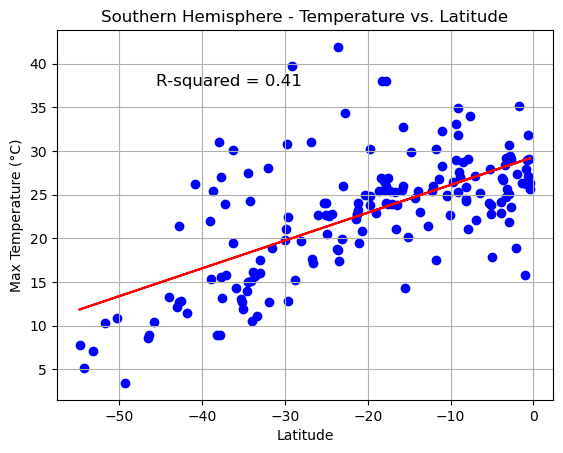

In [40]:
# Linear regression on Southern Hemisphere

# Import necessary libraries

# Define a function for linear regression and plotting
def perform_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Create a scatter plot of the data
    plt.scatter(x_data, y_data, marker='o', color='blue', label='Data Points')

    # Add a regression line to the plot
    regression_line = slope * x_data + intercept
    plt.plot(x_data, regression_line, color='red', label='Linear Regression')

    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the R-squared value on the plot
    plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

    # Show the plot
    plt.grid(True)
    plt.show()

# Extract data for Southern Hemisphere (e.g., temperature and latitude)
x_data_southern = southern_hemi_df['Lat']
y_data_southern = southern_hemi_df['Max Temp']

# Call the linear regression function
perform_linear_regression(x_data_southern, y_data_southern, 'Latitude', 'Max Temperature (°C)', 'Southern Hemisphere - Temperature vs. Latitude')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

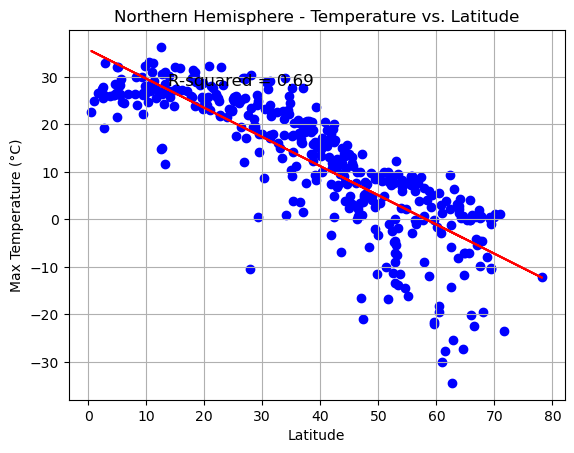

In [41]:
# Northern Hemisphere

# Define a function for linear regression and plotting
def perform_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Create a scatter plot of the data
    plt.scatter(x_data, y_data, marker='o', color='blue', label='Data Points')

    # Add a regression line to the plot
    regression_line = slope * x_data + intercept
    plt.plot(x_data, regression_line, color='red', label='Linear Regression')

    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the R-squared value on the plot
    plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

    # Show the plot
    plt.grid(True)
    plt.show()

# Extract data for Northern Hemisphere (e.g., temperature and latitude)
x_data_northern = northern_hemi_df['Lat']
y_data_northern = northern_hemi_df['Max Temp']

# Call the linear regression function
perform_linear_regression(x_data_northern, y_data_northern, 'Latitude', 'Max Temperature (°C)', 'Northern Hemisphere - Temperature vs. Latitude')

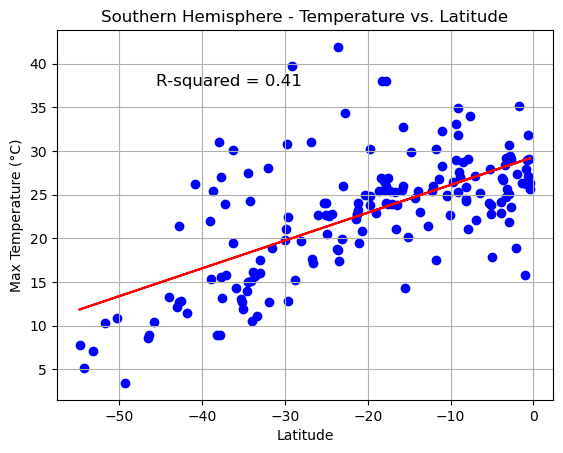

In [42]:
# Southern Hemisphere

# Define a function for linear regression and plotting
def perform_linear_regression(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Create a scatter plot of the data
    plt.scatter(x_data, y_data, marker='o', color='blue', label='Data Points')

    # Add a regression line to the plot
    regression_line = slope * x_data + intercept
    plt.plot(x_data, regression_line, color='red', label='Linear Regression')

    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the R-squared value on the plot
    plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

    # Show the plot
    plt.grid(True)
    plt.show()

# Extract data for Southern Hemisphere (e.g., temperature and latitude)
x_data_southern = southern_hemi_df['Lat']
y_data_southern = southern_hemi_df['Max Temp']

# Call the linear regression function
perform_linear_regression(x_data_southern, y_data_southern, 'Latitude', 'Max Temperature (°C)', 'Southern Hemisphere - Temperature vs. Latitude')


**Discussion about the linear relationship:** 

In the Northern Hemisphere, maximum temperature tends to decrease as you move away from the equator (higher latitudes), showing a negative linear relationship.
In the Southern Hemisphere, maximum temperature tends to increase as you move closer to the equator (lower latitudes), indicating a positive linear relationship.
These observations align with the expected temperature variations based on latitude and hemisphere, demonstrating a clear correlation between latitude and maximum temperature in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

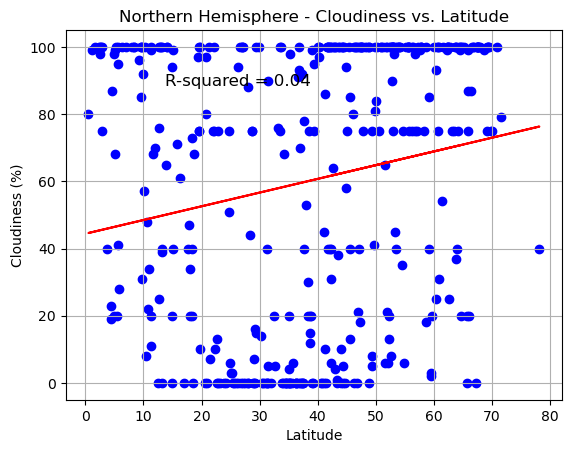

In [43]:
# Northern Hemisphere

# Extract data for the Northern Hemisphere
x_data_northern = northern_hemi_df['Lat']
y_data_northern = northern_hemi_df['Cloudiness']

# Perform linear regression and create the plot
slope, intercept, r_value, _, _ = linregress(x_data_northern, y_data_northern)
regression_line = slope * x_data_northern + intercept

# Create a scatter plot of the data
plt.scatter(x_data_northern, y_data_northern, marker='o', color='blue', label='Data Points')

# Add the linear regression line to the plot
plt.plot(x_data_northern, regression_line, color='red', label='Linear Regression')

# Add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

# Display the R-squared value on the plot
plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

# Add a legend and show the plot
plt.grid(True)
plt.show()


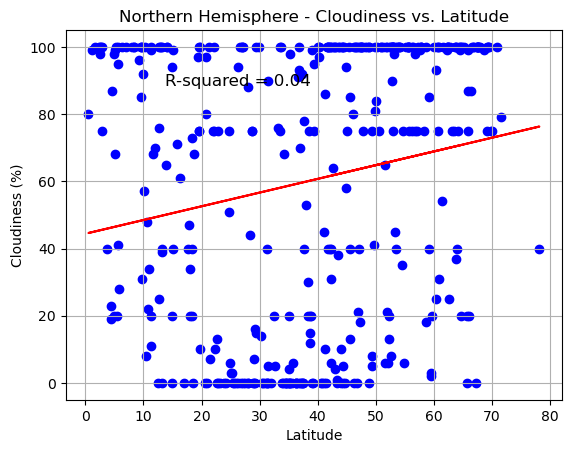

In [44]:
# Southern Hemisphere

# Extract data for the Northern Hemisphere
x_data_northern = northern_hemi_df['Lat']
y_data_northern = northern_hemi_df['Cloudiness']

# Perform linear regression and create the plot
slope, intercept, r_value, _, _ = linregress(x_data_northern, y_data_northern)
regression_line = slope * x_data_northern + intercept

# Create a scatter plot of the data
plt.scatter(x_data_northern, y_data_northern, marker='o', color='blue', label='Data Points')

# Add the linear regression line to the plot
plt.plot(x_data_northern, regression_line, color='red', label='Linear Regression')

# Add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

# Display the R-squared value on the plot
plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

# Add a legend and show the plot
plt.grid(True)
plt.show()



**Discussion about the linear relationship:** 
The linear regression plots for cloudiness vs. latitude in both the Northern Hemisphere and Southern Hemisphere do not exhibit a strong linear relationship. In both cases, the scattered data points show little to no clear pattern or trend along the latitude axis. The R-squared values for these plots are likely to be low, indicating that latitude has limited explanatory power in predicting cloudiness.

In summary, based on these linear regression plots, latitude does not appear to be a reliable predictor of cloudiness in either the Northern or Southern Hemisphere. Other factors and variables may play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

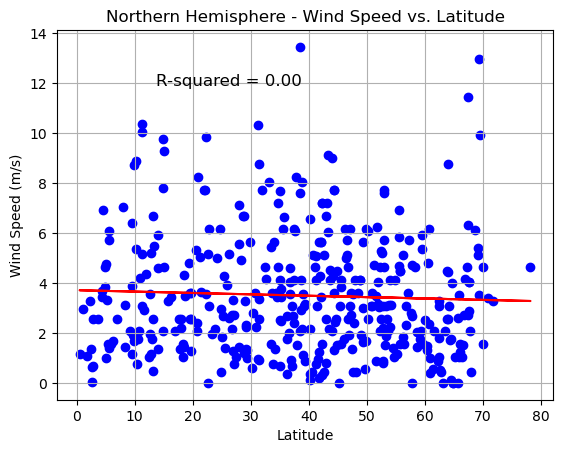

In [45]:
# Northern Hemisphere

# Extract data for the Northern Hemisphere
x_data_northern = northern_hemi_df['Lat']
y_data_northern = northern_hemi_df['Wind Speed']

# Perform linear regression and create the plot
slope, intercept, r_value, _, _ = linregress(x_data_northern, y_data_northern)
regression_line = slope * x_data_northern + intercept

# Create a scatter plot of the data
plt.scatter(x_data_northern, y_data_northern, marker='o', color='blue', label='Data Points')

# Add the linear regression line to the plot
plt.plot(x_data_northern, regression_line, color='red', label='Linear Regression')

# Add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

# Display the R-squared value on the plot
plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

# Add a legend and show the plot
plt.grid(True)
plt.show()


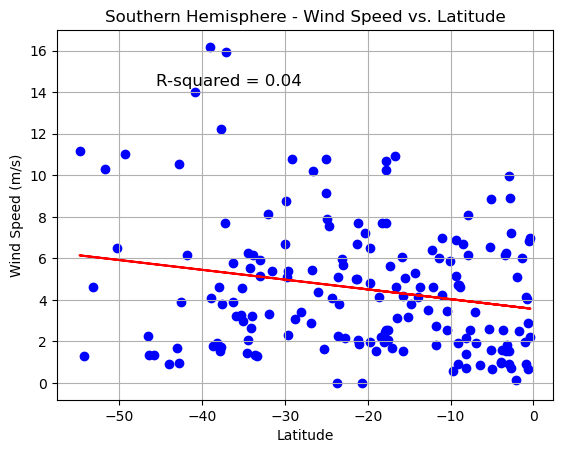

In [46]:
# Southern Hemisphere

# Extract data for the Southern Hemisphere
x_data_southern = southern_hemi_df['Lat']
y_data_southern = southern_hemi_df['Wind Speed']

# Perform linear regression and create the plot
slope, intercept, r_value, _, _ = linregress(x_data_southern, y_data_southern)
regression_line = slope * x_data_southern + intercept

# Create a scatter plot of the data
plt.scatter(x_data_southern, y_data_southern, marker='o', color='blue', label='Data Points')

# Add the linear regression line to the plot
plt.plot(x_data_southern, regression_line, color='red', label='Linear Regression')

# Add labels and a title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')

# Display the R-squared value on the plot
plt.annotate(f'R-squared = {r_value**2:.2f}', xy=(0.2, 0.85), xycoords='axes fraction', fontsize=12)

# Add a legend and show the plot
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** 
The linear regression plots for wind speed vs. latitude in both hemispheres do not show a significant linear relationship. Wind speed appears to vary independently of latitude in both the Northern and Southern Hemispheres, as indicated by the scattered data points.